# Task 4 - Image Classification
Mageshwaran Sankar

# Importing Necessary packages and Datasets

In [48]:
#importing packages

from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt
import numpy as np

In [49]:
#loading dataset

(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [50]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [51]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [52]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# Normalising 

In [53]:
#scaling independent variables(images)

x_train=x_train/255
x_test=x_test/255

In [54]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [55]:
y_train.shape

(50000, 1)

In [56]:
#reshaping target feature into single array

y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [57]:
y_train.shape

(50000,)

In [58]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

# Exploring the dataset

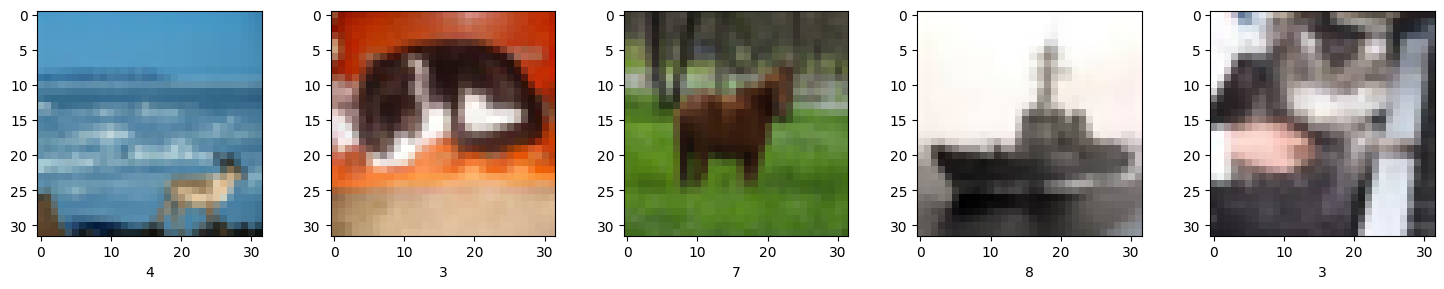

In [59]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(15,3))
for index in range(5):
    plt.subplot(1,5,index+1)
    i=random.randint(0,len(x_train))
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
    plt.tight_layout()

In [60]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

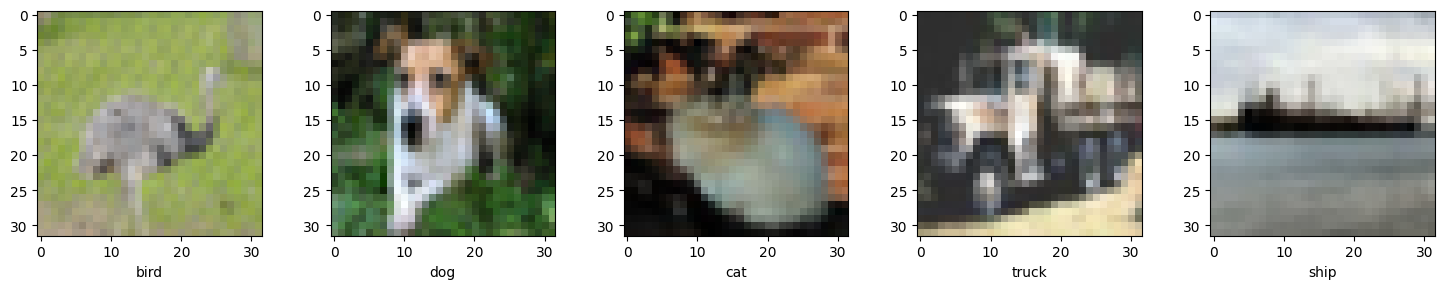

In [61]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(15,3))
for index in range(5):
    plt.subplot(1,5,index+1)
    i=random.randint(0,len(x_train))
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
    plt.tight_layout()

# CNN Model Building

In [62]:
x_train[0].shape

(32, 32, 3)

In [63]:
model=models.Sequential()

model.add(layers.Conv2D(input_shape=(x_train[0].shape), filters=32,kernel_size=(3,3),activation='relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(10,activation='softmax'))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Model Training

In [65]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.3921 - loss: 1.6714 - val_accuracy: 0.5544 - val_loss: 1.2770
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5715 - loss: 1.2069 - val_accuracy: 0.5695 - val_loss: 1.2085
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6206 - loss: 1.0841 - val_accuracy: 0.6280 - val_loss: 1.0762
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6553 - loss: 0.9923 - val_accuracy: 0.6297 - val_loss: 1.0663
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6806 - loss: 0.9186 - val_accuracy: 0.6271 - val_loss: 1.0853
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6979 - loss: 0.8600 - val_accuracy: 0.6463 - val_loss: 1.0373
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7116 - loss: 0.8289 - val_accuracy: 0.6396 - val_loss: 1.0506
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7268 -

In [66]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6521 - loss: 1.0429


[1.0607467889785767, 0.6452000141143799]

# Predictions

In [67]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [71]:
y_pred[0]

array([2.5531781e-04, 1.9903504e-03, 6.1373512e-04, 8.7165362e-01,
       1.1059665e-04, 1.0395690e-01, 1.2388494e-02, 2.2257710e-04,
       6.2692831e-03, 2.5391812e-03], dtype=float32)

In [75]:
y_pred.shape

(10000, 10)

In [76]:
y_pred_proper=[np.argmax(list) for list in y_pred]

In [77]:
print(y_pred_proper)

[3, 8, 8, 8, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 5, 8, 6, 7, 0, 2, 9, 4, 6, 4, 0, 9, 6, 3, 5, 2, 3, 9, 9, 4, 9, 9, 5, 0, 6, 3, 6, 9, 9, 3, 9, 7, 2, 9, 8, 2, 3, 8, 8, 7, 8, 5, 5, 7, 3, 6, 0, 6, 2, 1, 8, 3, 1, 4, 6, 8, 8, 9, 2, 0, 3, 5, 8, 8, 9, 1, 3, 2, 7, 4, 0, 9, 9, 8, 6, 8, 6, 4, 6, 6, 8, 2, 7, 4, 5, 6, 3, 1, 1, 8, 6, 8, 7, 7, 0, 6, 2, 9, 3, 0, 4, 6, 5, 8, 4, 1, 7, 9, 0, 8, 3, 6, 6, 4, 9, 9, 9, 1, 2, 9, 7, 4, 8, 4, 5, 3, 5, 8, 4, 6, 6, 5, 3, 8, 9, 6, 0, 0, 5, 2, 9, 3, 4, 0, 1, 1, 6, 0, 7, 8, 6, 5, 0, 9, 0, 9, 8, 9, 9, 3, 7, 5, 9, 0, 7, 6, 2, 5, 8, 6, 3, 6, 8, 2, 3, 0, 1, 7, 6, 8, 8, 3, 8, 3, 9, 8, 7, 1, 3, 8, 5, 7, 9, 5, 9, 5, 9, 8, 3, 4, 9, 0, 7, 7, 3, 9, 5, 4, 9, 3, 2, 4, 3, 3, 1, 3, 1, 8, 0, 4, 4, 3, 2, 1, 9, 8, 9, 0, 2, 9, 8, 2, 0, 7, 5, 9, 9, 2, 0, 3, 0, 8, 9, 8, 1, 0, 3, 0, 8, 4, 4, 7, 0, 2, 3, 6, 3, 8, 2, 0, 4, 4, 7, 9, 0, 3, 1, 9, 9, 1, 8, 7, 9, 1, 2, 6, 9, 3, 2, 6, 0, 0, 6, 6, 6, 5, 5, 6, 8, 9, 2, 1, 2, 8, 6, 8, 0, 4, 0, 7, 7, 5, 5, 3, 3, 6, 2, 5, 1, 7, 5, 2, 6, 1, 9, 6, 

# Evaluation

In [78]:
print(classification_report(y_test,y_pred_proper))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1000
           1       0.82      0.69      0.75      1000
           2       0.58      0.45      0.51      1000
           3       0.47      0.47      0.47      1000
           4       0.60      0.58      0.59      1000
           5       0.58      0.52      0.54      1000
           6       0.67      0.78      0.72      1000
           7       0.72      0.71      0.72      1000
           8       0.68      0.81      0.74      1000
           9       0.65      0.79      0.71      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000



# Manual Evaluation

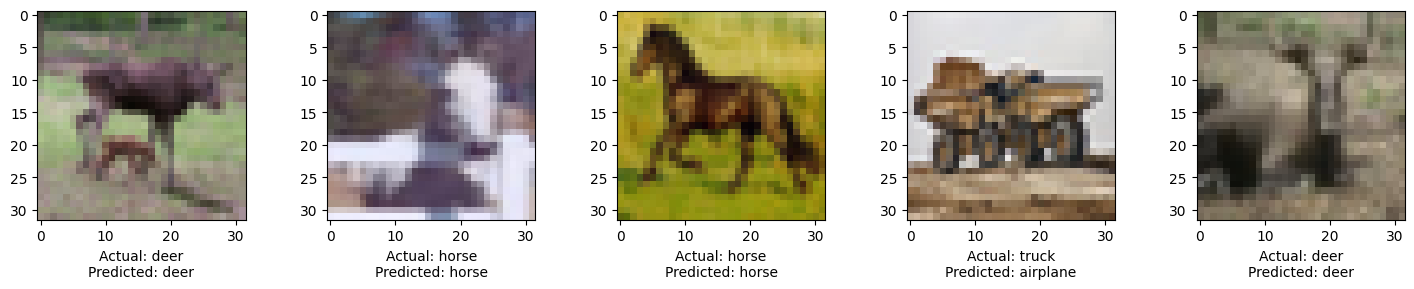

In [85]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(15,3))
for index in range(5):
    plt.subplot(1,5,index+1)
    i=random.randint(0,len(x_test))
    plt.imshow(x_test[i])
    j='Actual: '+class_names[y_test[i]]+ '\nPredicted: '+class_names[y_pred_proper[i]]
    plt.xlabel(j)
    plt.tight_layout()